In [1]:
import sys, os 
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../')))

sys.path.append("/lustre/storeB/users/martinls/src/opendrift")

In [2]:
%matplotlib inline

In [3]:
from opendrift.models.oceandrift import OceanDrift
from opendrift.readers import reader_netCDF_CF_generic

import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

np.random.seed(983214)

matplotlib and/or cartopy is not available, can not make plots


In [5]:
#o = OceanDrift(loglevel=20) # Lower log level will crash the notebook for anything but very small simulations
o = OceanDrift(loglevel=50)

In [6]:
print(OceanDrift.required_variables)
print(OceanDrift.fallback_values)

# vertical profiles
print(OceanDrift.required_profiles)
print(OceanDrift.required_profiles_z_range)

['x_sea_water_velocity', 'y_sea_water_velocity', 'x_wind', 'y_wind', 'land_binary_mask']
{'x_sea_water_velocity': 0, 'y_sea_water_velocity': 0, 'x_wind': 0, 'y_wind': 0}
None
None


In [14]:
model_input_file = '/lustre/storeB/users/martinls/src/gpu-ocean/gpu_ocean/demos/netcdf_cache/NorKyst-800m_ZDEPTHS_his.an.2019071600.nc'

reader_norkyst = reader_netCDF_CF_generic.Reader(model_input_file)
print(reader_norkyst)

Reader: /lustre/storeB/users/martinls/src/gpu-ocean/gpu_ocean/demos/netcdf_cache/NorKyst-800m_ZDEPTHS_his.an.2019071600.nc
Projection: 
  +proj=stere +ellps=WGS84 +lat_0=90.0 +lat_ts=60.0 +x_0=3192800 +y_0=1784000 +lon_0=70
Coverage: [m]
  xmin: 0.000000   xmax: 2080800.000000   step: 800   numx: 2602
  ymin: 0.000000   ymax: 720800.000000   step: 800   numy: 902
  Corners (lon, lat):
    ( -1.58,  58.50)  ( 23.71,  75.32)
    (  9.19,  55.91)  ( 38.06,  70.03)
Vertical levels [m]: 
  [-0.0 -3.0 -10.0 -15.0 -25.0 -50.0 -75.0 -100.0 -150.0 -200.0 -250.0
 -300.0 -500.0 -1000.0 -2000.0 -3000.0]
Available time range:
  start: 2019-07-16 00:00:00   end: 2019-07-16 23:00:00   step: 1:00:00
    24 times (0 missing)
Variables:
  salinity_vertical_diffusion_coefficient
  x_wind
  y_wind
  forecast_reference_time
  sea_floor_depth_below_sea_level
  latitude
  longitude
  sea_water_salinity
  sea_water_temperature
  time
  x_sea_water_velocity
  eastward_sea_water_velocity
  y_sea_water_velocity


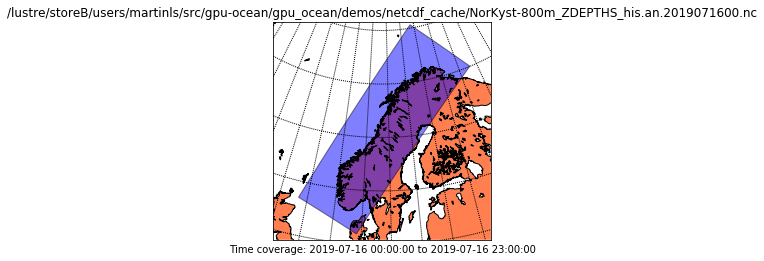

In [15]:
reader_norkyst.plot()

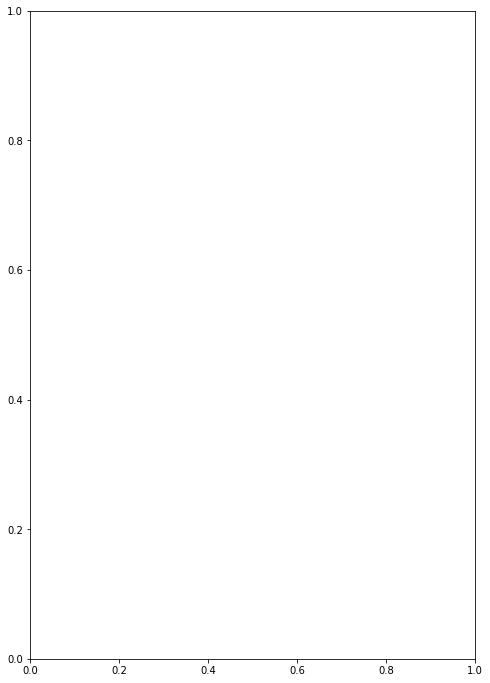

In [16]:
from opendrift.readers import reader_basemap_landmask
reader_basemap = reader_basemap_landmask.Reader(
                       llcrnrlon=2, llcrnrlat=59,
                       urcrnrlon=8, urcrnrlat=63,
                       resolution='h', projection='merc')


In [17]:
o.add_reader([reader_basemap, reader_norkyst])
#o.add_reader([reader_norkyst])

In [18]:
print(o)

Model:	OceanDrift     (OpenDrift version 1.1.0rc2)
	0 active PassiveTracer particles  (0 deactivated, 0 scheduled)
Projection: +proj=merc +R=6370997.0 +units=m +lat_ts=0.0 +lon_0=5.0 +x_0=-0.0 +y_0=-8171229.358844567 
-------------------
Environment variables:
  -----
  land_binary_mask
     1) basemap_landmask
  -----
  x_sea_water_velocity
  x_wind
  y_sea_water_velocity
  y_wind
     1) /lustre/storeB/users/martinls/src/gpu-ocean/gpu_ocean/demos/netcdf_cache/NorKyst-800m_ZDEPTHS_his.an.2019071600.nc



In [19]:
o.seed_elements(lon=4.3, lat=60, time=datetime(2016,2,25,18,0,0))

In [20]:
# TODO: Check: No wind drift factor for OceanDrift
#o.set_config('drift:wind_drift_factor', None)
#wind_drift_factor = o.get_config('drift:wind_drift_factor')

In [1]:
o.run(end_time=reader_norkyst.end_time, time_step=900,
          time_step_output=3600, outfile='opendrift.nc')#,
          #export_variables=['density', 'water_content'])

NameError: name 'o' is not defined

In [ ]:
o.plot()

In [ ]:
o.animation()